In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_df = pd.read_csv("sign_mnist_train.csv")
test_df  = pd.read_csv("sign_mnist_test.csv")


In [5]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
# TRAIN
y_train = train_df['label']
X_train = train_df.drop('label', axis=1)

# TEST
y_test = test_df['label']
X_test = test_df.drop('label', axis=1)


In [8]:
X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values


In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)


In [10]:
X_train = X_train / 255.0
X_test  = X_test / 255.0


In [11]:
print("Label unik:", sorted(set(y_train)))
print("Jumlah kelas =", len(set(y_train)))


Label unik: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24)]
Jumlah kelas = 24


In [13]:
num_classes = 25

y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)


In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


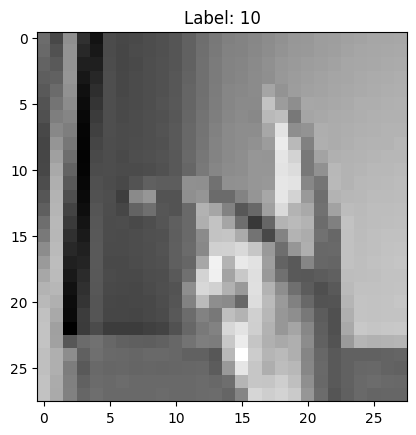

In [15]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title("Label: {}".format(np.argmax(y_train[0])))
plt.show()


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [39]:
model = Sequential([
    # Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Layer 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Layer 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,305 (442.60 KB)

 Trainable params: 112,857 (440.85 KB)

 Non-trainable params: 448 (1.75 KB)

In [40]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [41]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)


Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6384 - loss: 1.2660 - val_accuracy: 0.3919 - val_loss: 1.8629
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step - accuracy: 0.9947 - loss: 0.0276 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 32s 93ms/step - accuracy: 0.9966 - loss: 0.0147 - val_accuracy: 0.8853 - val_loss: 0.3558
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9943 - loss: 0.0199 - val_accuracy: 0.9969 - val_loss: 0.0124
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 29s 85ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9466 - val_loss: 0.1933
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9488 - val_loss: 0.1661
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - accuracy: 0.9979 - loss: 0.0084 - 

In [42]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9519 - loss: 0.1617
Test Accuracy: 0.950641393661499


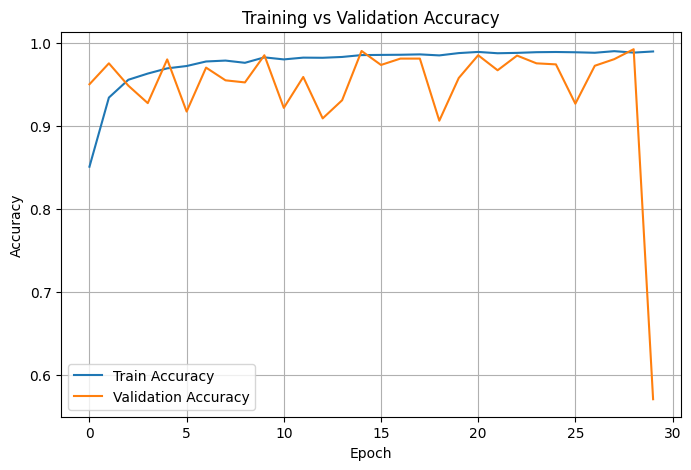

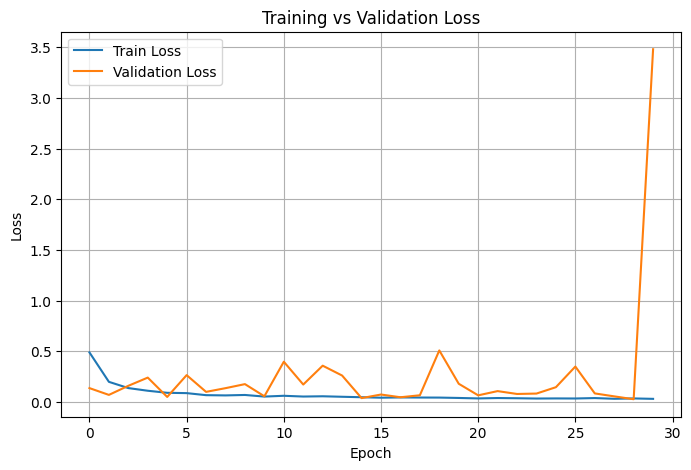

In [49]:
import matplotlib.pyplot as plt

# --- Plot Akurasi ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot Loss ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [23]:
num_classes = 25

model = Sequential([
    # Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Layer 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Layer 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),

    # Fully Connected
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,041 (523.60 KB)

 Trainable params: 133,081 (519.85 KB)

 Non-trainable params: 960 (3.75 KB)

In [24]:
optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Konfigurasi augmentasi data
datagen = ImageDataGenerator(
    rotation_range=10,       # Putar gambar secara acak hingga 10 derajat
    width_shift_range=0.1,   # Geser gambar secara horizontal
    height_shift_range=0.1,  # Geser gambar secara vertikal
    zoom_range=0.1,          # Zoom gambar secara acak
    shear_range=0.1          # Miringkan gambar
)

# "Pasang" (fit) generator ke data latih Anda
datagen.fit(X_train)

In [27]:
# Latih model menggunakan data yang di-generate oleh datagen
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=50,  # Tambah epoch karena augmentasi butuh waktu lebih lama
    callbacks=[early_stop]
)

Epoch 1/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 43s 113ms/step - accuracy: 0.1921 - loss: 3.2245 - val_accuracy: 0.1271 - val_loss: 3.5449
Epoch 2/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.5161 - loss: 1.5041 - val_accuracy: 0.7942 - val_loss: 0.6540
Epoch 3/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - accuracy: 0.6796 - loss: 0.9544 - val_accuracy: 0.9037 - val_loss: 0.2967
Epoch 4/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 117ms/step - accuracy: 0.7768 - loss: 0.6632 - val_accuracy: 0.9395 - val_loss: 0.1937
Epoch 5/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.8281 - loss: 0.4983 - val_accuracy: 0.9707 - val_loss: 0.1302
Epoch 6/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - accuracy: 0.8697 - loss: 0.3875 - val_accuracy: 0.9825 - val_loss: 0.0685
Epoch 7/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 116ms/step - accuracy: 0.8923 - loss: 0.3183 - val_accuracy: 0.9758 - val_loss: 0.0832
Epoch 8/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - accuracy: 0.9084 - loss: 0

In [28]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9993 - loss: 0.0043
Test Accuracy: 0.9995816946029663


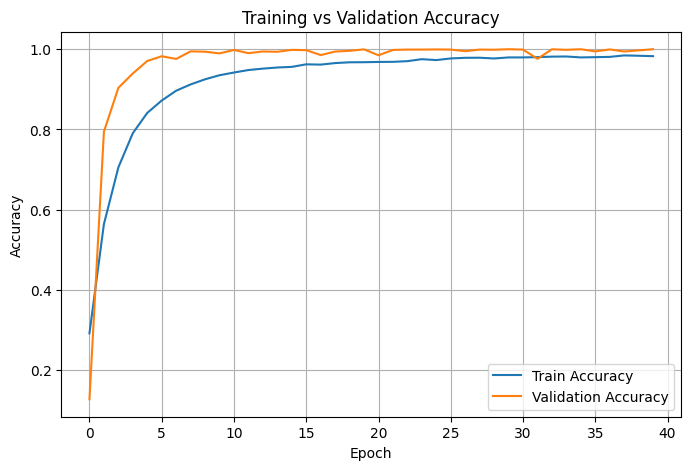

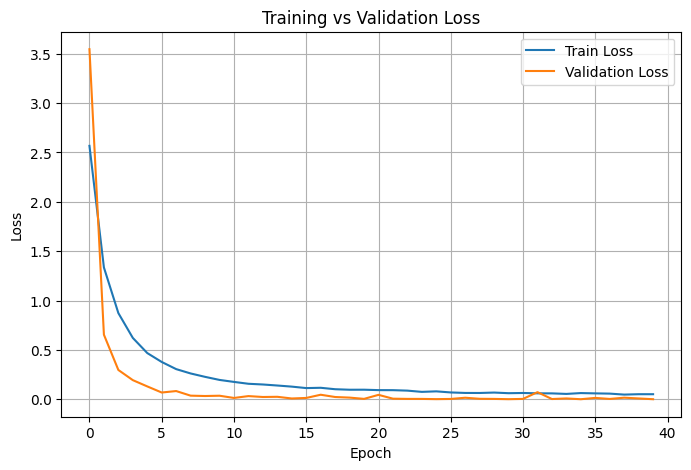

In [29]:

# --- Plot Akurasi ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot Loss ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


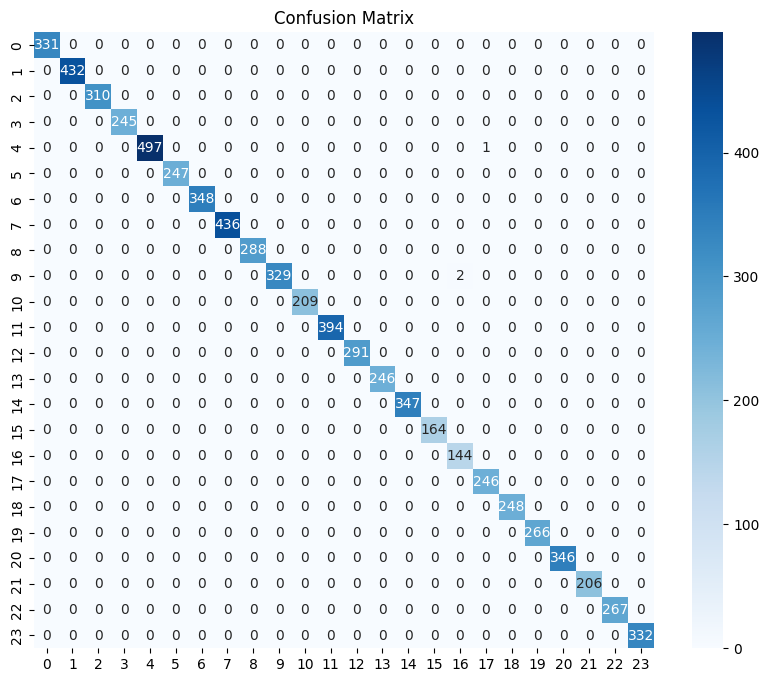

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
          10       1.00      0.99      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.99      1.00      0.99       144
          18       1.00    

In [37]:
import cv2
import numpy as np

def predict_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))
    img = img.reshape(1, 28, 28, 1) / 255.0

    pred = model.predict(img)
    class_id = np.argmax(pred)
    return class_id

print(predict_image("/content/test_image.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
23


In [63]:
model.save("sign_language_classifier.h5")
